In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt
import lightcones.linalg as la
from scipy.sparse.linalg import eigsh, eigs
import scipy.sparse as sparse

In [68]:
epsilon = 0.1
dt = 0.01
t_past = 40
t_future = 40 

In [69]:
n_rel = 10

In [70]:
t_max = t_past + t_future
t = np.arange(0, t_max, dt)
n_t_max = len(t)

In [71]:
n_t_past = int(t_past / dt)
n_t_future = int(t_future / dt)

In [ ]:
M = np.zeros(n_t_max) 
for i in range(n_t_max):
    M[i] = epsilon / (epsilon**2 + (t[i] - t[0])**2)

In [73]:
def apply_memory_matrix(x):
    x_out = np.zeros(n_t_past)
    for i in range(n_t_future):
        m = M[i:i+n_t_past]
        x_out = x_out + np.vdot(m, x) * m
    return x_out

In [74]:
memory_matrix = sparse.linalg.LinearOperator((n_t_past, n_t_past), matvec=apply_memory_matrix)

In [75]:
pi, v = eigsh(memory_matrix, k=n_rel, which='LM')

In [76]:
pi

array([1.72046817e-05, 7.17167132e-05, 8.58489567e-04, 6.63479442e-03,
       2.76410484e-02, 1.91609858e-01, 2.44788614e+00, 6.89077486e+00,
       6.33575154e+01, 5.75410679e+03])

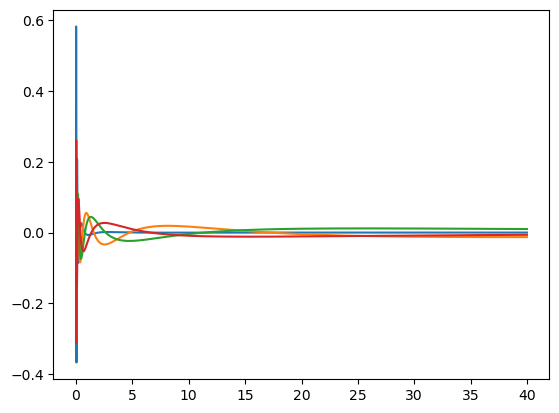

In [81]:
plt.plot(t[:n_t_past], v[:,0])
plt.plot(t[:n_t_past], v[:,1])
plt.plot(t[:n_t_past], v[:,2])
plt.plot(t[:n_t_past], v[:,3])

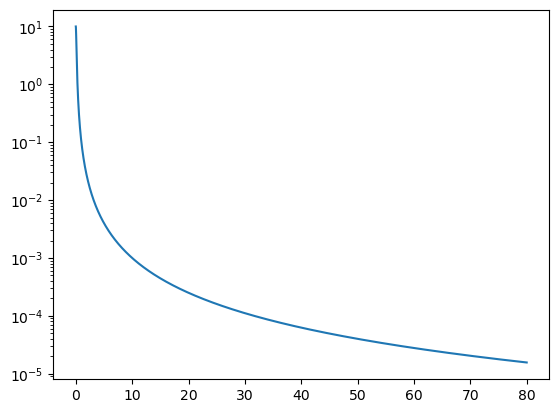

In [77]:
plt.yscale('log')
plt.plot(t, M)

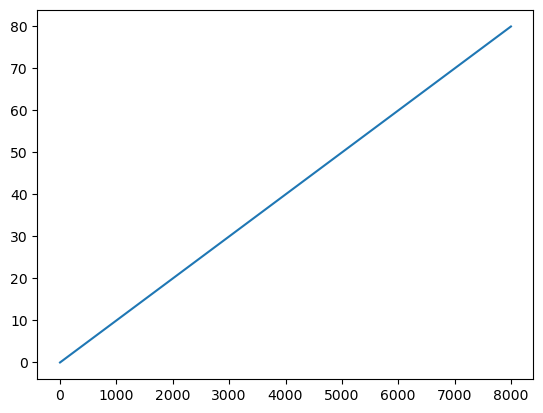

In [78]:
plt.plot(t)